<a href="https://colab.research.google.com/github/Lavkesh-kumar/Crop-and-Fertilizer-Recommendation-System/blob/main/Crop_recommendation_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import random

# Visualization
import matplotlib
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
import warnings
warnings.filterwarnings('ignore')

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']

In [2]:
crop_df = pd.read_csv("/content/drive/MyDrive/Dataset/Crop_recommendation.csv")
# fertilizer_df = pd.read_csv("/content/drive/MyDrive/Dataset/Fertilizer Prediction.csv")

In [3]:
crop_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# **EDA**

------


> **Exploratory Data Analysis (EDA)**


------


## **Univariate Analysis**

In [4]:
crop_df.describe().T

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


------


> **Descriptive Statistics**
Helps to understand the central tendency, dispersion, shape and distribution of dataset.


-----



**Continuous Variables**

**N, P, K, temperature, humidity, ph, rainfall** are all continuous variables.

**Nitrogen (N)**: Ranges from 0 to 140 with a mean of around 50.55.

**Phosphorus (P)**: Ranges from 5 to 145 with a mean of approximately 53.36.

**Potassium (K)**: Has a wide range from 5 to 205, average near 48.15.

**Temperature**: Varies from 8.83°C to 43.68°C, average around 25.62°C.

**Humidity**: Ranges widely from 14.26% to nearly 100%, with an average of 71.48%.

**pH**: Varies from 3.50 to 9.94, with a mean value close to 6.47, which is slightly acidic.

**Rainfall**: Ranges from 20.21 mm to 298.56 mm, with an average of 103.46 mm.

**Categorical Variables**

**Label (Crop Type)**: There are 22 unique types of crops in the dataset.




In [5]:
corr=crop_df.drop(['label'],axis=1).corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

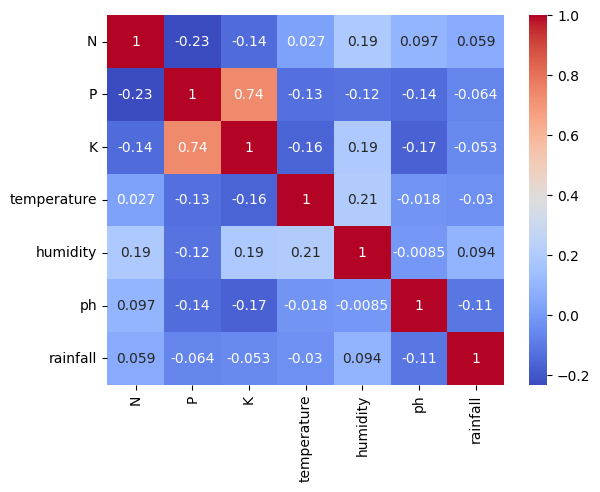

In [6]:
sns.heatmap(corr, annot = True, cbar = True, cmap = 'coolwarm')


---

>* **Correlation Analysis**

---



Here's what we can infer from the correlation matrix and heatmap:

**Strong Correlations:**

Notably, there are no extremely strong correlations (above 0.8 or below -0.8) observed among the variables. This absence of strong correlations is generally favorable for building machine learning models, as it indicates less multicollinearity. Multicollinearity, where predictor variables are highly correlated, can lead to instability and difficulty in interpreting model coefficients.

**Moderate Correlations:**

Several moderate correlations are present, suggesting noteworthy relationships between certain variables. For instance, temperature and humidity exhibit a moderate negative correlation, which aligns with the intuitive understanding that higher temperatures often lead to lower humidity levels. Similarly, phosphorus (P) and potassium (K) show a moderate positive correlation, indicating a tendency for these nutrients to increase or decrease together.

**Weak Correlations:**

A majority of the variable pairs display weak correlations, implying that they provide largely independent information for crop recommendation. This is beneficial as it allows the model to capture diverse aspects of the data and make more informed predictions.

**Overall Implications:**

The correlation analysis suggests that the dataset is generally well-suited for machine learning modeling due to the limited multicollinearity and the presence of diverse relationships between variables. These insights guide feature selection and model development, enabling the creation of robust and interpretable crop recommendation systems.

In [7]:
crop_df['label'].value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


**Categorical Variable**
The bar plot for label (Crop Type) shows that the dataset is evenly distributed across different crop types, with each type having a similar count. This is beneficial for a balanced classification model.

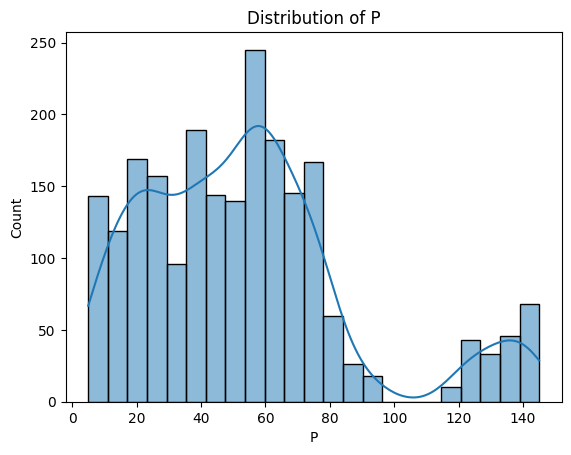

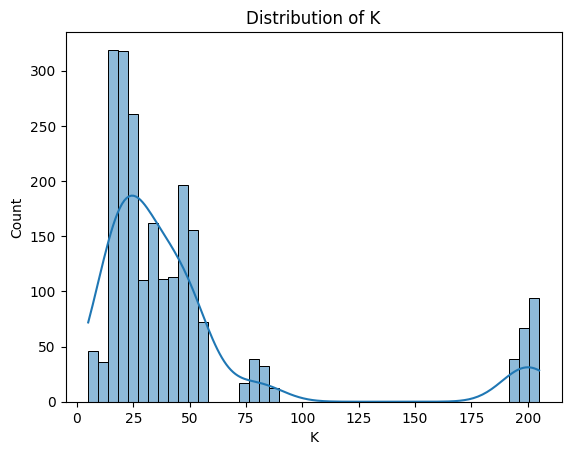

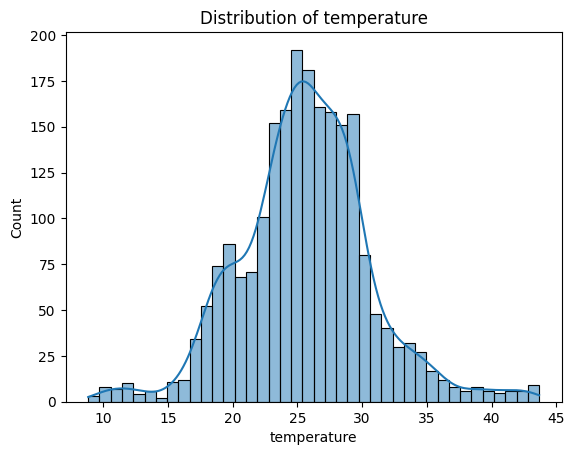

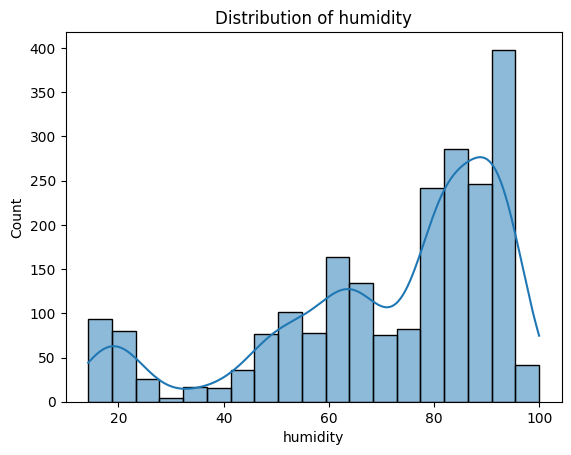

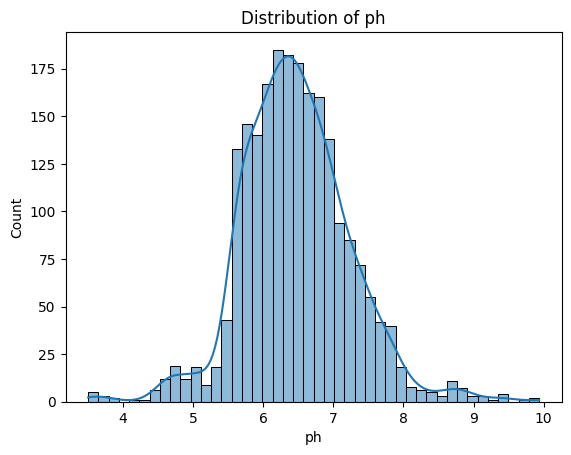

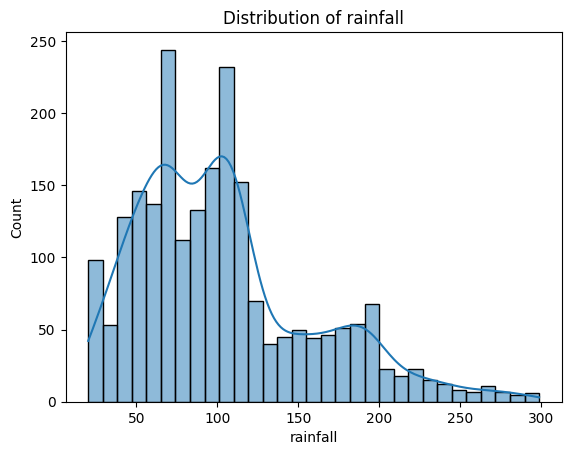

In [8]:
# Distribution of 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall' features
features = ['P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for feature in features:
    sns.histplot(crop_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

------

> **Data Distribution** : By visualizing the distribution of each feature to understand their spread and identify any skewness or unusual patterns.

-----

****



**Histogram**

It helps in visualizing the distribution of each specified feature individually through histograms.It's useful for understanding the spread, central tendency, and shape of the data for each feature separately.

These histograms can provide insights into whether the data follows a normal distribution, is skewed, or has outliers.

Insights from histogram of each of the continuous varible are -


 <table>
   <tr>
     <th>Varible</th>
     <th>Description</th>
   </tr>
   <tr>
     <td>N, P, K</td>
     <td>These soil nutrients show varied distributions. Some display a bimodal nature (having two peaks), suggesting different groups in the data.</td>
   </tr>
   <tr>
     <td>Temperature</td>
     <td>Appears to be normally distributed.</td>
   </tr>
      <tr>
     <td>Humidity</td>
     <td>Shows a left-skewed distribution, with a high frequency of values towards the higher end.</td>
   </tr>
    <tr>
     <td>pH</td>
     <td>This is fairly normally distributed, slightly leaning towards acidic values (less than 7).</td>
   </tr>
    <tr>
     <td>Rainfall</td>
     <td>Displays a right-skewed distribution, indicating that higher rainfall amounts are less common.</td>
   </tr>
 </table>



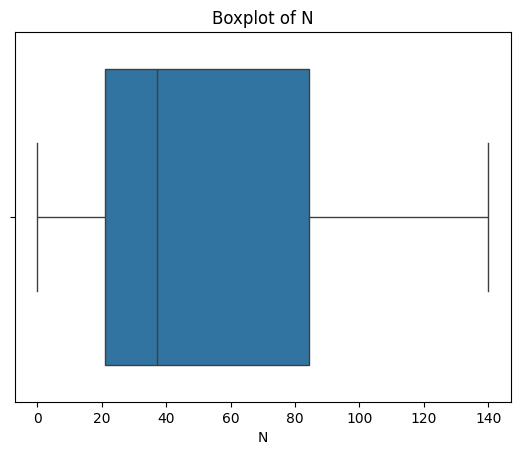

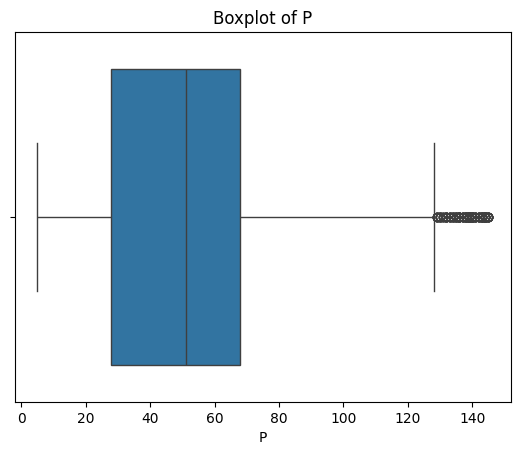

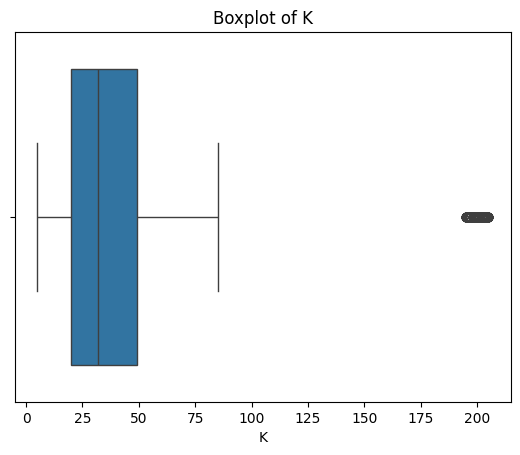

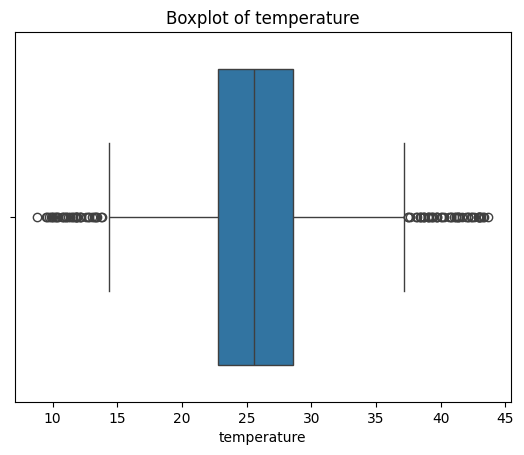

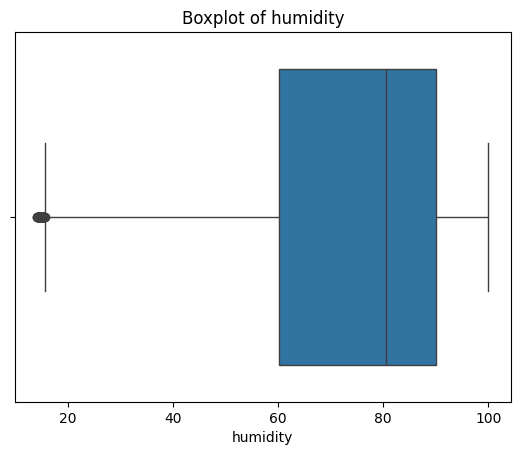

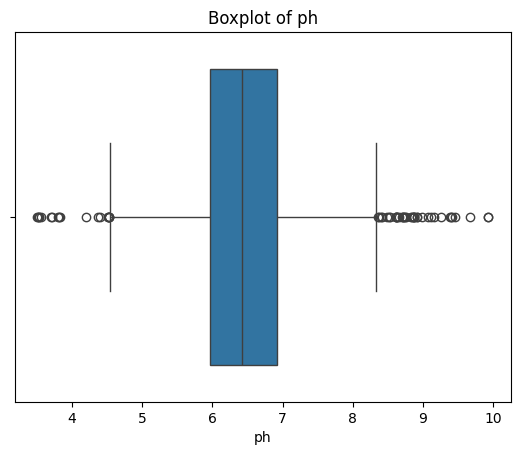

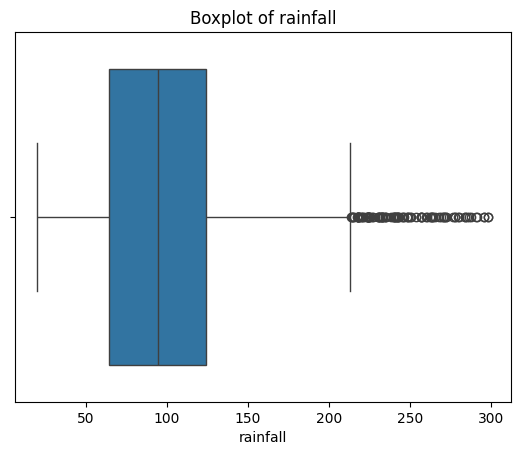

In [9]:
# Boxplot for 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall' features
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for feature in features:
    sns.boxplot(x=crop_df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()



---



> **Outlier detection**



---






----

**BOXPLOT**

----
It helps visualize the distribution and statistical summary of each specified feature using boxplots.
Boxplots provide information about the median, quartiles, and potential outliers in the data.

1. Boxplots display the distribution of data points.
2.The line inside the box represents the median.
3. The box itself represents the interquartile range (IQR), which contains 50% of the data.
4. Whiskers extend to the minimum and maximum values within 1.5 times the IQR from the first and third quartiles, respectively.
5. Points outside the whiskers are considered outliers and plotted individually.
6. It allows you to visually identify the central tendency, spread, and potential outliers in each feature's distribution.

----------

**Insights from box plot**

**Soil Nutrients (N, P, K)**
These features show some outliers, particularly on the higher end. This could be due to specific crops requiring significantly different nutrient levels.

**Temperature**
Few outliers are observed, particularly on the lower end.

**Humidity**
There are some outliers at the lower end, indicating instances of very low humidity.

**pH**
This feature also shows some outliers, especially on the lower (more acidic) and higher (more alkaline) ends.

**Rainfall**
There are noticeable outliers, particularly on the higher end, indicating periods of heavy rainfall.

---------
**Considerations for Outliers**

It's essential to understand the context behind these outliers. In agriculture, extreme values for factors like soil nutrients, pH, and rainfall can be realistic in certain conditions and for certain crops.Rather than removing these outliers, a more nuanced approach could involve understanding their impact on crop recommendations.

## **Bivariate Analysis**

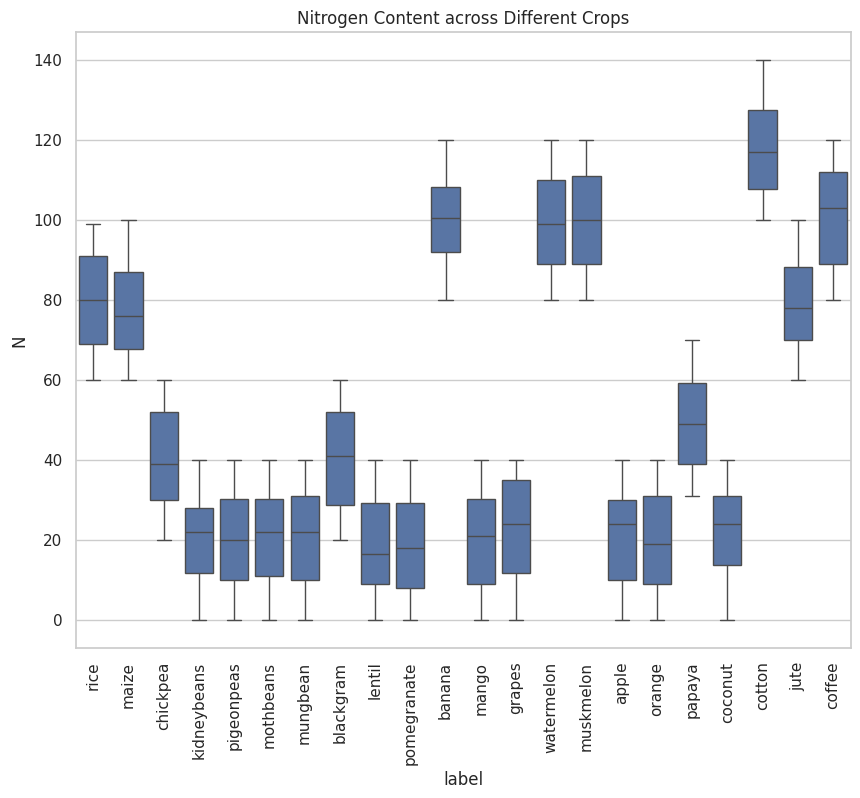

In [10]:

# Setting plot aesthetics
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 8]


# Box Plots for a variable against crop types
sns.boxplot(x='label', y='N', data=crop_df)
plt.xticks(rotation=90)
plt.title('Nitrogen Content across Different Crops')
plt.show()

--------

> **Baivarite analysis :**  helps to understand relationship b/w 2 different varibles

--------

**Scatter Plots:** These plots help in visualizing the relationship between pairs of continuous variables and how they cluster by crop type. Scatter plots between key variables like Nitrogen (N) vs. Phosphorus (P) and Temperature vs. Humidity are shown. These plots include a hue based on the crop type, which helps in identifying patterns specific to different crops.


**Box Plots:** Box plots provide insights into how continuous variables distribute across different crop types, highlighting median, quartiles, and potential outliers. Box plots are used to understand the distribution of a particular variable, such as Nitrogen content, across different crop types. This helps in identifying which crops require higher or lower levels of certain nutrients.

In [11]:
nutrients = ['N', 'P', 'K']
avg_nutrients = crop_df.groupby('label')[nutrients].mean().reset_index()

fig = go.Figure()

for i in range(len(avg_nutrients)):
    fig.add_trace(go.Scatterpolar(
        r=avg_nutrients.iloc[i, 1:],
        theta=nutrients,
        fill='toself',
        name=avg_nutrients['label'][i]
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True,)),
    showlegend=True
)
fig.show()

**Radar Chart for Nutrient Levels by Crop**


The code generates a radar chart to visualize the average levels of Nitrogen (N), Phosphorus (P), and Potassium (K) for different crops in the dataset. Here's a breakdown:

**Purpose:** The radar chart provides a visual comparison of nutrient requirements across various crops. This helps to quickly identify which crops have similar or contrasting nutrient needs.

**Data:** The chart is based on the average values of N, P, and K for each crop type, calculated from the crop_df DataFrame.

**Structure:**

**Axes:** The chart has two main axes:

**Radial Axis:** This axis represents the magnitude or value of the nutrient levels. The scale is determined automatically based on the data range.

**Angular Axis:** This axis represents the three nutrients (N, P, K), each positioned at a distinct angle around the chart.

**Data Points:** Each crop is represented by a data point on the chart, with its position determined by its average nutrient levels for N, P, and K.

**Filled Areas:** Lines connecting the data points for each crop form a polygon, which is then filled to highlight the nutrient profile of that crop.


**Interpretation:**

**Crop Comparison:** By comparing the shapes and sizes of the filled areas, you can quickly identify crops with similar or different nutrient requirements.

**Nutrient Levels:** The distance of a crop's data point from the center of the chart indicates the overall level of nutrients required by that crop.
Nutrient Balance: The shape of the polygon for a crop gives an idea of the relative balance between N, P, and K for that crop.

-------
> **Data Visualization and analysis**
-------

In [12]:
crop_summary = pd.pivot_table(crop_df,index=['label'],aggfunc='mean')
crop_summary.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892


**Nitrogen Analysis**

In [13]:
crop_summary_N = crop_summary.sort_values(by='N', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_N['N'][0:10].sort_values().index,
    'x' : crop_summary_N['N'][0:10].sort_values()
}

last = {
    'y' : crop_summary_N['N'][-10:].index,
    'x' : crop_summary_N['N'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),

    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Nitrogen (N)",
                  plot_bgcolor='white',
                  font_size=12,
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

**Phosphorus Analysis**

In [14]:
crop_summary_P = crop_summary.sort_values(by='P', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_P['P'][0:10].sort_values().index,
    'x' : crop_summary_P['P'][0:10].sort_values()
}

last = {
    'y' : crop_summary_P['P'][-10:].index,
    'x' : crop_summary_P['P'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),

    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Phosphorus (P)",
                  plot_bgcolor='white',
                  font_size=12,
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

**Potasium Analysis**

In [15]:
crop_summary_K = crop_summary.sort_values(by='K', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_K['K'][0:10].sort_values().index,
    'x' : crop_summary_K['K'][0:10].sort_values()
}

last = {
    'y' : crop_summary_K['K'][-10:].index,
    'x' : crop_summary_K['K'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),

    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Potassium (K)",
                  plot_bgcolor='white',
                  font_size=12,
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

**N, P, K values comparision between crops**

In [16]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['N'],
    name='Nitrogen',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['P'],
    name='Phosphorous',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['K'],
    name='Potash',
    marker_color='crimson'
))

fig.update_layout(title="N, P, K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

# **FEATURE ENGINEERING**

In [17]:
crop_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [18]:
crop_df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [19]:
crop_df.shape

(2200, 8)

In [20]:
crop_df.dtypes

,0
N,int64
P,int64
K,int64
temperature,float64
humidity,float64
ph,float64
rainfall,float64
label,object


In [21]:
for col in crop_df.columns:
    print(f"#unique value for {col} is : {len(crop_df[col].unique())}")

#unique value for N is : 137
#unique value for P is : 117
#unique value for K is : 73
#unique value for temperature is : 2200
#unique value for humidity is : 2200
#unique value for ph is : 2200
#unique value for rainfall is : 2200
#unique value for label is : 22


In [22]:
crop_df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

**Separating train and test dataset**

In [23]:
X=crop_df.drop('label',axis=1)
Y=crop_df['label']

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [25]:
print(X_train.shape , X_test.shape)
print(Y_train.shape , Y_test.shape)

(1760, 7) (440, 7)
(1760,) (440,)


**MinMaxScaler, which transforms the data into the range [0, 1] by default.**

In [26]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()


ms.fit(X_train)
X_train = ms.transform(X_train)
X_test = ms.transform(X_test)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [28]:
X_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

In [29]:
X_test

array([[ 1.34934948, -1.0960582 , -0.02225388, ...,  1.05232434,
        -0.37619899, -1.38984486],
       [ 1.26889319, -1.36698971,  0.05607978, ...,  0.67956909,
        -0.28013033, -0.96895253],
       [ 0.22296144,  0.25859933,  0.01691295, ...,  0.98974316,
         0.60209743,  0.22056087],
       ...,
       [ 1.88572474, -0.19295318, -0.62933977, ...,  0.35134079,
         1.61311363, -0.54905776],
       [ 1.75163092, -0.04243567, -0.57058952, ...,  0.1731198 ,
        -0.46741089, -0.64767698],
       [-1.22525175,  0.43922034, -0.55100611, ..., -1.74645651,
        -0.45817577,  0.95946086]])